In [8]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import svm
from sklearn.externals import joblib
import json
import pymongo
import tweepy

In [123]:
file = pd.read_csv('clean_newauthors.csv')

Y_FC = pd.Series.to_frame(file['FC'])
Y_RT = pd.Series.to_frame(file['RT'])

X = file
X.drop('FC',axis=1,inplace=True)
X.drop('RT',axis=1,inplace=True)
#X.drop('Unnamed: 0', axis=1,inplace=True)

A = list(X.columns.values)

X.head()

,Unnamed: 0,RT_l10,sd_RT,FC_l10,sd_FC,followers_count,friends_count,listed_count,favourites_count,statuses_count,...,geo_enabled,verified,contributors_enabled,is_translator,is_translation_enabled,profile_background_tile,profile_use_background_image,has_extended_profile,default_profile,default_profile_image
0,0,0.4,0.489898,1.7,3.796051,5386.0,3861.0,304.0,15325.0,85493.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,8.4,16.805951,76.1,127.668673,24075.0,100.0,96.0,20991.0,10496.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.2,0.400000,2.5,3.442383,297.0,190.0,9.0,6257.0,28572.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.000000,0.3,0.458258,557.0,650.0,19.0,6218.0,5983.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,3.6,6.711185,2.8,5.015974,54626.0,4640.0,1646.0,405.0,70865.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
r_state = [0,1,2,3,4,5,42,43,44,45]
acc = np.zeros((len(r_state),2))

for i in range(len(r_state)):
    X_train_FC, X_test_FC, y_train_FC, y_test_FC = model_selection.train_test_split(X, Y_FC, train_size=0.7, random_state=r_state[i])
    X_train_RT, X_test_RT, y_train_RT, y_test_RT = model_selection.train_test_split(X, Y_RT, train_size=0.7, random_state=r_state[i])
    
    scaler = StandardScaler()
    scaler = scaler.fit(X_train_FC)
    X_train_FC_scaled = scaler.transform(X_train_FC)
    X_test_FC_scaled = scaler.transform(X_test_FC)
    scaler = scaler.fit(X_train_RT)
    X_train_RT_scaled = scaler.transform(X_train_RT)
    X_test_RT_scaled = scaler.transform(X_test_RT)
    
    
    svm_FC = svm.SVC(C=10.0,gamma = 0.0001,random_state=42) 
    svm_FC.fit(X_train_FC_scaled,y_train_FC)
    yhat_FC = svm_FC.predict(X_test_FC_scaled)
    
    svm_RT = svm.SVC(C=0.001,gamma = 1e-6,random_state=42) 
    svm_RT.fit(X_train_RT_scaled,y_train_RT)
    yhat_RT = svm_RT.predict(X_test_RT_scaled)
    
    acc[i,0] = metrics.accuracy_score(y_test_FC,yhat_FC)
    acc[i,1] = metrics.accuracy_score(y_test_RT,yhat_RT)

print("mean accuracy FC:",np.mean(acc[:,0]))
print("mean accuracy RT:",np.mean(acc[:,1]))

/home/nuria/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/nuria/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean accuracy FC: 0.47594142259414224
mean accuracy RT: 0.7790794979079498


In [125]:
# Prepare the model for the webpage

# Save fitted model to a .sav file
def save_model(clf, name):
    filename = 'trained_'+name+'.sav'
    joblib.dump(clf, filename)
    return filename

# Load the fitted model from a .sav file
def load_model(filename):
    return joblib.load(filename)

In [126]:
file = pd.read_csv('clean_newauthors.csv')

Y_FC = pd.Series.to_frame(file['FC'])
Y_RT = pd.Series.to_frame(file['RT'])

X = file
X.drop('FC',axis=1,inplace=True)
X.drop('RT',axis=1,inplace=True)

In [127]:
print(X.shape)
print(Y_FC.shape)
print(Y_RT.shape)

print(X)

(1592, 21)
(1592, 1)
(1592, 1)
      Unnamed: 0  RT_l10      sd_RT  FC_l10       sd_FC  followers_count  \
0              0     0.4   0.489898     1.7    3.796051           5386.0   
1              1     8.4  16.805951    76.1  127.668673          24075.0   
2              2     0.2   0.400000     2.5    3.442383            297.0   
3              3     0.0   0.000000     0.3    0.458258            557.0   
4              4     3.6   6.711185     2.8    5.015974          54626.0   
5              5     0.1   0.300000     0.7    0.781025            724.0   
6              6     0.1   0.300000     0.5    0.670820            710.0   
7              7     0.8   1.249000     4.5    6.917369           3965.0   
8              8     0.0   0.000000     0.0    0.000000           1165.0   
9              9     1.1   1.044031     1.1    1.135782           5276.0   
10            10     0.3   0.640312     1.8    2.315167            144.0   
11            11     0.0   0.000000     1.1    1.135782  

In [128]:
scaler = StandardScaler()
scaler = scaler.fit(X)

scaler_file = save_model(scaler, 'scaler')
print(scaler_file)

trained_scaler.sav


In [129]:
X_scaled = scaler.transform(X)

svm_FC = svm.SVC(C=10.0, gamma=0.0001) 
svm_FC.fit(X_scaled,Y_FC)

model_file_FC = save_model(svm_FC, 'model_FC')
print(model_file_FC)

svm_RT = svm.SVC(C=0.001, gamma=1e-6) 
svm_RT.fit(X_scaled,Y_RT)

model_file_RT = save_model(svm_RT, 'model_RT')
print(model_file_RT)

/home/nuria/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


trained_model_FC.sav
trained_model_RT.sav


In [130]:
# Transform customer information to an input data for the classifier


numl = 1 # one user

cols_basic = ['Unnamed: 0','RT_l10','sd_RT','FC_l10','sd_FC','FC','RT']
cols_num = ['followers_count','friends_count','listed_count','favourites_count','statuses_count']
cols_TF = ['protected','geo_enabled','verified','contributors_enabled','is_translator','is_translation_enabled',
        'profile_background_tile','profile_use_background_image','has_extended_profile','default_profile','default_profile_image']

file = pd.DataFrame(columns=np.r_[cols_basic,cols_num,cols_TF])

for col in np.r_[cols_basic,cols_num,cols_TF]:
    file[col]=np.zeros(numl)
    
file.head()

,Unnamed: 0,RT_l10,sd_RT,FC_l10,sd_FC,FC,RT,followers_count,friends_count,listed_count,...,geo_enabled,verified,contributors_enabled,is_translator,is_translation_enabled,profile_background_tile,profile_use_background_image,has_extended_profile,default_profile,default_profile_image
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
j_user = {'id': 2107671, 'id_str': '2107671', 'name': 'Gabriel Navarro', 'screen_name': 'gabinavarros', 'location': 'Murcia, Spain', 'description': '#Comunicación #Digital #Pymes. Licenciado en #Economía (@EconomicasUMU) y Graduado en #Filosofía (@FacFilosoMurcia) por la @UMU.', 'url': 'https://t.co/hWz3N9kxZM', 'entities': {'url': {'urls': [{'url': 'https://t.co/hWz3N9kxZM', 'expanded_url': 'http://about.me/gabinavarro', 'display_url': 'about.me/gabinavarro', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 5386, 'friends_count': 3861, 'listed_count': 304, 'created_at': 'Sat Mar 24 14:28:53 +0000 2007', 'favourites_count': 15325, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 85493, 'lang': 'es', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'FFFFFF', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme13/bg.gif', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme13/bg.gif', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1059181678755831808/CDqXOZGB_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1059181678755831808/CDqXOZGB_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2107671/1540285952', 'profile_link_color': '0084B4', 'profile_sidebar_border_color': 'BDDCAD', 'profile_sidebar_fill_color': 'DDFFCD', 'profile_text_color': '333333', 'profile_use_background_image': True, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': False, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}

for col in cols_num:
    file[col] = int(j_user[col])
for col in cols_TF:
    if (j_user[col]=='True'):
        file[col] = 1
    else:
        file[col] = 0

In [132]:
file.head()

,Unnamed: 0,RT_l10,sd_RT,FC_l10,sd_FC,FC,RT,followers_count,friends_count,listed_count,...,geo_enabled,verified,contributors_enabled,is_translator,is_translation_enabled,profile_background_tile,profile_use_background_image,has_extended_profile,default_profile,default_profile_image
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5386,3861,304,...,0,0,0,0,0,0,0,0,0,0


In [133]:
def get_10tweets(username, api):
    import pandas as pd
    import numpy as np
    
    tweets_10 = []
    count = 10
    
    while len(tweets_10) < 10:
        
        try:
            tweets = api.user_timeline(screen_name=username, count=count)
        except tweepy.TweepError:
            return 0, tweets_10
        
        for tweet in tweets:
            doc = tweet._json
            doc['id'] = str(doc['id'])
            
            if doc not in tweets_10 and not doc['text'].startswith('RT '):
                tweets_10.append(doc)
            else:
                count += 1
            
            if len(tweets_10) == 10:
                break
    
    out = pd.DataFrame()
    t = pd.DataFrame(tweets_10)
    
    mean_FC_last10, sd_FC = np.mean(t["favorite_count"]), np.std(t["favorite_count"])
    mean_RT_last10, sd_RT = np.mean(t["retweet_count"]), np.std(t["retweet_count"])
    
    out["j_user"]=t["user"][-1:]
    out["RT_l10"]=mean_RT_last10
    out["sd_RT"]=sd_RT
    out["FC_l10"]=mean_FC_last10
    out["sd_FC"]=sd_FC
    return out

def authenticate_api():
    with open('consumer_key.txt', 'r') as f:
        consumer_key =  f.read()
    f.closed

    with open('consumer_secret.txt', 'r') as f:
        consumer_secret = f.read()
    f.closed

    with open('access_key.txt', 'r') as f:
        access_key = f.read()
    f.closed

    with open('access_secret.txt', 'r') as f:
         access_secret = f.read()
    f.closed

    # Authentication
    auth = tweepy.OAuthHandler(consumer_key[:-1], consumer_secret[:-1])
    auth.set_access_token(access_key[:-1], access_secret[:-1])
    api = tweepy.API(auth)
    return api

In [134]:
username = j_user['screen_name']
api = authenticate_api()
out = get_10tweets(username, api)

In [135]:
out.head()

,j_user,RT_l10,sd_RT,FC_l10,sd_FC
9,"{'id': 2107671, 'id_str': '2107671', 'name': '...",0.0,0.0,0.4,0.489898


In [137]:
for col in cols_basic[1:5]:
    file[col] = float(out[col])

In [138]:
file.head()

,Unnamed: 0,RT_l10,sd_RT,FC_l10,sd_FC,FC,RT,followers_count,friends_count,listed_count,...,geo_enabled,verified,contributors_enabled,is_translator,is_translation_enabled,profile_background_tile,profile_use_background_image,has_extended_profile,default_profile,default_profile_image
0,0.0,0.0,0.0,0.4,0.489898,0.0,0.0,5386,3861,304,...,0,0,0,0,0,0,0,0,0,0


In [139]:
# predict from 
user_info = file
user_info.drop('FC',axis=1,inplace=True)
user_info.drop('RT',axis=1,inplace=True)
user_info.head()
B = list(user_info.columns.values)

In [140]:
print(len(A))
print(len(B))

21
21


In [142]:
scaler = load_model('trained_scaler.sav')
scaler = StandardScaler()
user_info_scaled = scaler.fit_transform(user_info)



model_FC = load_model('trained_model_FC.sav')
model_RT = load_model('trained_model_RT.sav')

predicted_FC = model_FC.predict(user_info_scaled)
predicted_RT = model_RT.predict(user_info_scaled)

print(predicted_FC)
print(predicted_RT)

[0.]
[0.]


In [146]:
reset -f

In [12]:
def save_model(clf, name):
    filename = 'trained_'+name+'.sav'
    joblib.dump(clf, filename)
    return filename

def load_model(filename):
    return joblib.load(filename)

def get_10tweets(username, api):
    import pandas as pd
    import numpy as np
    
    tweets_10 = []
    count = 10
    
    while len(tweets_10) < 10:
        
        try:
            tweets = api.user_timeline(screen_name=username, count=count)
        except tweepy.TweepError:
            return 0, tweets_10
        
        for tweet in tweets:
            doc = tweet._json
            doc['id'] = str(doc['id'])
            
            if doc not in tweets_10 and not doc['text'].startswith('RT '):
                tweets_10.append(doc)
            else:
                count += 1
            
            if len(tweets_10) == 10:
                break
    return tweets_10


def get_10tweets_df(username, api):
    import pandas as pd
    import numpy as np
    
    tweets_10 = []
    count = 10
    
    while len(tweets_10) < 10:
        
        try:
            tweets = api.user_timeline(screen_name=username, count=count)
        except tweepy.TweepError:
            return 0, tweets_10
        
        for tweet in tweets:
            doc = tweet._json
            doc['id'] = str(doc['id'])
            
            if doc not in tweets_10 and not doc['text'].startswith('RT '):
                tweets_10.append(doc)
            else:
                count += 1
            
            if len(tweets_10) == 10:
                break
    
    out = pd.DataFrame()
    t = pd.DataFrame(tweets_10)
    
    mean_FC_last10, sd_FC = np.mean(t["favorite_count"]), np.std(t["favorite_count"])
    mean_RT_last10, sd_RT = np.mean(t["retweet_count"]), np.std(t["retweet_count"])
    
    out["j_user"]=t["user"][-1:]
    out["RT_l10"]=mean_RT_last10
    out["sd_RT"]=sd_RT
    out["FC_l10"]=mean_FC_last10
    out["sd_FC"]=sd_FC
    return out

def authenticate_api():
    with open('consumer_key.txt', 'r') as f:
        consumer_key =  f.read()
    f.closed

    with open('consumer_secret.txt', 'r') as f:
        consumer_secret = f.read()
    f.closed

    with open('access_key.txt', 'r') as f:
        access_key = f.read()
    f.closed

    with open('access_secret.txt', 'r') as f:
         access_secret = f.read()
    f.closed

    # Authentication
    auth = tweepy.OAuthHandler(consumer_key[:-1], consumer_secret[:-1])
    auth.set_access_token(access_key[:-1], access_secret[:-1])
    api = tweepy.API(auth)
    return api

def prepare_info_predict(j_user):
    numl = 1
    cols_basic = ['Unnamed: 0','RT_l10','sd_RT','FC_l10','sd_FC','FC','RT']
    cols_num = ['followers_count','friends_count','listed_count','favourites_count','statuses_count']
    cols_TF = ['protected','geo_enabled','verified','contributors_enabled','is_translator','is_translation_enabled',
            'profile_background_tile','profile_use_background_image','has_extended_profile','default_profile','default_profile_image']
    file = pd.DataFrame(columns=np.r_[cols_basic,cols_num,cols_TF])
    for col in np.r_[cols_basic,cols_num,cols_TF]:
        file[col]=np.zeros(numl)
    
    for col in cols_num:
        file[col] = int(j_user[col])
    for col in cols_TF:
        if (j_user[col]=='True'):
            file[col] = 1
        else:
            file[col] = 0
        
    username = j_user['screen_name']
    api = authenticate_api()
    out = get_10tweets_df(username, api)
    
    for col in cols_basic[1:5]:
        file[col] = float(out[col])
    
    user_info = file
    user_info.drop('FC',axis=1,inplace=True)
    user_info.drop('RT',axis=1,inplace=True)
    
    return user_info

def get_prediction(user_info):
    scaler = StandardScaler()
    user_info_scaled = scaler.fit_transform(user_info)



    model_FC = load_model('trained_model_FC.sav')
    model_RT = load_model('trained_model_RT.sav')

    predicted_FC = model_FC.predict(user_info_scaled)
    predicted_RT = model_RT.predict(user_info_scaled)
    
    return predicted_FC, predicted_RT

In [13]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import svm
from sklearn.externals import joblib
import json
import pymongo
import tweepy

j_user = {'id': 2107671, 'id_str': '2107671', 'name': 'Gabriel Navarro', 'screen_name': 'gabinavarros', 'location': 'Murcia, Spain', 'description': '#Comunicación #Digital #Pymes. Licenciado en #Economía (@EconomicasUMU) y Graduado en #Filosofía (@FacFilosoMurcia) por la @UMU.', 'url': 'https://t.co/hWz3N9kxZM', 'entities': {'url': {'urls': [{'url': 'https://t.co/hWz3N9kxZM', 'expanded_url': 'http://about.me/gabinavarro', 'display_url': 'about.me/gabinavarro', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 5386, 'friends_count': 3861, 'listed_count': 304, 'created_at': 'Sat Mar 24 14:28:53 +0000 2007', 'favourites_count': 15325, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 85493, 'lang': 'es', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'FFFFFF', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme13/bg.gif', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme13/bg.gif', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1059181678755831808/CDqXOZGB_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1059181678755831808/CDqXOZGB_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2107671/1540285952', 'profile_link_color': '0084B4', 'profile_sidebar_border_color': 'BDDCAD', 'profile_sidebar_fill_color': 'DDFFCD', 'profile_text_color': '333333', 'profile_use_background_image': True, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': False, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}

user_info = prepare_info_predict(j_user)
FC, RT = get_prediction(user_info)

print(FC)
print(RT)

[0.]
[0.]


In [14]:
def get_TT():
    TT = []
    api = authenticate_api()
    results = api.trends_place(23424950)
    for location in results:
        for trend in location["trends"]:
            TT.append(trend["name"])
    return TT
            
TT = get_TT()
print(TT)

['#OTDirecto18DIC', 'Campofrío', '#LauraSomosTodas', 'Mourinho', '#DiaInternacionalDelMigrante', 'Crepúsculo', 'Bota de Oro', '#niunamasniunamenos', '#MujerBruja21D', 'Álvaro Zancajo', "'Bambi'", 'Dani García', 'Adolf Hitler', 'Steven Spielberg', 'Brad Pitt', 'Obtuve Tipo', 'ignacio gonzález', 'Saturno', 'Manacor', 'Alfonso Ribeiro', 'Fridman', 'El Intermedio', 'Zidane', 'Córdoba CF', 'Cabildo de Gran Canaria', 'Fran Sandaza', 'Código Penal', 'Los Lobos', 'Florit', 'Hunosa', 'rfef', 'Dakar', 'San Javier', 'Alejandro Valverde', 'Siberia', '#somoslaaudiencia18d', '#corrersinmiedo', '#DíaNacionalEM', '#CopaLNFS', '#GHVIP18D', '#MovistarTeam2019', '#SánchezSenado', '#JUGONES', '#regal_ESS', '#patrocinado', '#EnergíaNavideñaNaturgy18', '#Pleno', '#RSA2018', '#pactoXinfancia', '#FelizMartes']


In [23]:
def get_10tweets(username, n_tweets, dash, api):
      
    #Authentication
    #auth = tweepy.OAuthHandler(os.environ['consumer_key'], os.environ['consumer_secret'])
    #auth.set_access_token(os.environ['access_key'],os.environ['access_secret'])
    #api = tweepy.API(auth)

    tweets_10 = []
    MAX_ID = 9000000000000000000
    aux = 0
    count = 10
    while len(tweets_10) < n_tweets:
        
        try:
            tweets = api.user_timeline(screen_name=username, count=count, max_id = MAX_ID)
        except tweepy.TweepError:
            return 0, tweets_10
        
        for tweet in tweets:
            doc = tweet._json
            doc['id'] = str(doc['id'])
            
            if doc not in tweets_10 and not doc['text'].startswith('RT '):
                tweets_10.append(doc)
            else:
                MAX_ID = doc['id']
            
            if len(tweets_10) == n_tweets:
                break
        if aux > 20:
            # Could only find less than n_tweets tweets in n_tweets*20 searched tweets.
            return 2, tweets_10
        aux += 1

    out = pd.DataFrame()
    t = pd.DataFrame(tweets_10)
    
    if dash == False:
        mean_FC_last10, sd_FC = np.mean(t["favorite_count"]), np.std(t["favorite_count"])
        mean_RT_last10, sd_RT = np.mean(t["retweet_count"]), np.std(t["retweet_count"])

        out["j_user"]=t["user"][-1:]
        out["RT_l10"]=mean_RT_last10
        out["sd_RT"]=sd_RT
        out["FC_l10"]=mean_FC_last10
        out["sd_FC"]=sd_FC
        out = out.reset_index(drop=True)  
        return out
    
    if dash:
        t1 = t[["text", "favorite_count", "retweet_count"]]
        CA = t["created_at"]
        CA_l = [time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(CA[i],'%a %b %d %H:%M:%S +0000 %Y'))for i in range(0,len(CA))]
        t1["created_at"] = CA_l
        return t1

In [102]:
import pandas as pd
import numpy as np
import tweepy
import time
import os
import matplotlib.pyplot as plt

username = 'ramonmir94'
api = authenticate_api()
out = get_10tweets(username, 10, True, api)

data = out["created_at"]
FC = out['favorite_count']
RT = out['retweet_count']


/home/nuria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [103]:
import matplotlib.dates as mdates
import datetime

In [104]:
datetime.datetime.strptime

<function datetime.strptime>

In [105]:
data = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in data]
FC = [int(fc) for fc in FC]
RT = [int(rt) for rt in RT]

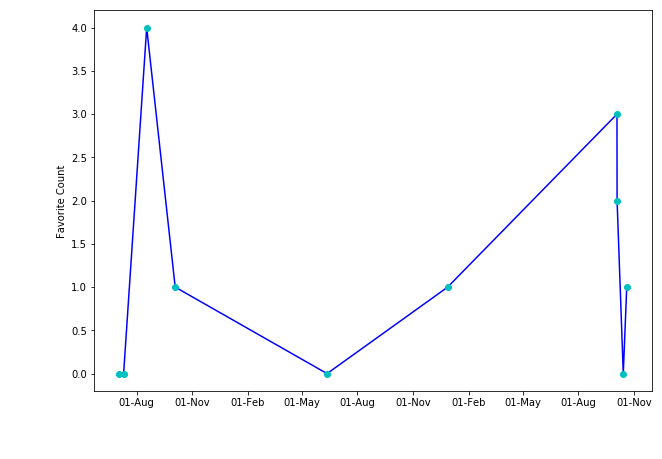

In [112]:
plt.figure(figsize=(10,7))
plt.plot(data, FC, "b")
plt.plot(data, FC, "oc")
cur_axes = plt.gca()
cur_axes.xaxis.set_major_formatter(mdates.DateFormatter("%d-%b"))
plt.ylabel('Favorite Count')
plt.annotate("hola", (3,4), (3.1,4.1))
plt.savefig('FCplot.png')
plt.show()

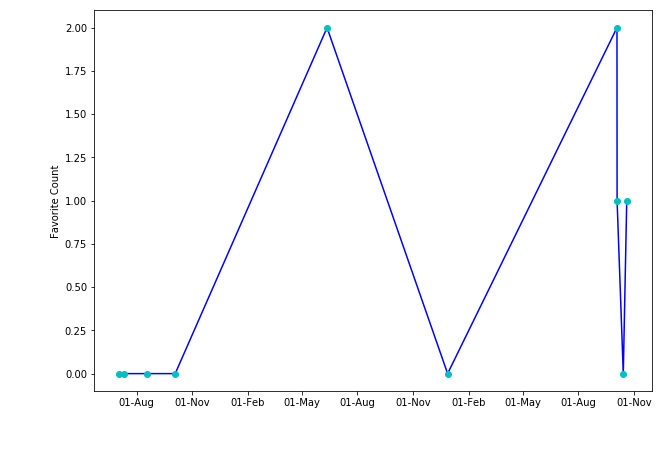

In [113]:
plt.figure(figsize=(10,7))
plt.plot(data, RT, "b")
plt.plot(data, RT, "oc")
cur_axes = plt.gca()
cur_axes.xaxis.set_major_formatter(mdates.DateFormatter("%d-%b"))
plt.ylabel('Favorite Count')
plt.annotate("hola", (3,4), (3.1,4.1))
plt.savefig('RTplot.png')
plt.show()

In [ ]:
def get_plot_images(username):
    out = get_10tweets(username, 10, True) # funció de l'Albert
    data = out["created_at"]
    FC = out['favorite_count']
    RT = out['retweet_count']
    data = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in data]
    FC = [int(fc) for fc in FC]
    RT = [int(rt) for rt in RT]
    
    plt.figure(figsize=(10,7))
    plt.plot(data, FC, "b")
    plt.plot(data, FC, "oc")
    cur_axes = plt.gca()
    cur_axes.xaxis.set_major_formatter(mdates.DateFormatter("%d-%b"))
    plt.ylabel('Favorite Count')
    plt.annotate("hola", (3,4), (3.1,4.1))
    plt.savefig('FCplot.png')
    
    plt.figure(figsize=(10,7))
    plt.plot(data, RT, "b")
    plt.plot(data, RT, "oc")
    cur_axes = plt.gca()
    cur_axes.xaxis.set_major_formatter(mdates.DateFormatter("%d-%b"))
    plt.ylabel('Favorite Count')
    plt.annotate("hola", (3,4), (3.1,4.1))
    plt.savefig('RTplot.png')